In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports

import logging
import torch

from PIL import Image
from torchvision import models as M
from torchvision.io import read_video
from torchvision.transforms import transforms as T
from torchvision.transforms import functional as fn

from LoopClosureDL import DeeperLoopClosureDL as LoopClosureDL
import matplotlib.pyplot as plt
from matplotlib import cm as cm

logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)


In [3]:
frames, _, _ = read_video(str("imgs/city_actual_short.mp4"), output_format="TCHW")
print(type(frames))
print(frames.shape)

frames = frames.float() / 255


transform = T.Compose([
   T.Resize(240),
   T.CenterCrop(224),
   T.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
   )
])


data = transform(frames[range(0, frames.shape[0], 10)])
print(data.shape)
print(torch.max(data))
print(torch.min(data))

/Users/ronitarora/Documents/Ronit Arora - Georgia Tech General/Georgia Tech Courses/ Fall 2022 Semester Georgia Tech/VIP Fall 2022/Loop Closure Project/vip-venv/lib/python3.8/site-packages/torchvision/io/video.py:162: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


<class 'torch.Tensor'>
torch.Size([849, 3, 720, 1280])
torch.Size([85, 3, 224, 224])
tensor(2.6400)
tensor(-2.1179)


In [33]:
dl = LoopClosureDL()
# Not sure why I had to manuallly intervene here
dl.vector_length = 23
print(dl.vector_length)


23


In [34]:
dl.compute_hook_activation(data)
dl.post_processing()
sim = dl.produce_similarity()
print(sim)

torch.Size([85, 2048])
tensor([[0.0000, 0.0023, 0.0000,  ..., 0.0000, 0.1861, 0.0000],
        [0.0260, 0.0916, 0.0668,  ..., 0.0257, 0.0000, 0.0003],
        [0.0569, 0.0000, 0.0000,  ..., 0.0330, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0138, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1076]])
tensor([[-0.1573, -0.1693,  0.0173,  ..., -0.0012,  0.0532,  0.0211],
        [ 0.0311,  0.0358,  0.0029,  ...,  0.2616, -0.2722, -0.0422],
        [ 0.0745,  0.0314,  0.0372,  ...,  0.1593, -0.1127,  0.1641],
        ...,
        [ 0.1575,  0.0199, -0.1928,  ...,  0.0168, -0.0775,  0.0065],
        [ 0.1616,  0.0284, -0.2115,  ...,  0.0793, -0.0814, -0.0567],
        [ 0.1170,  0.0029, -0.1839,  ...,  0.0780, -0.1735, -0.0388]])
tensor([[1.0000, 0.0183, 0.0000,  ..., 0.0000, 0.0000, 0.0209],
        [0.0183, 1.0000, 0.7790,  ..., 0.0000, 0.0972, 0.1315],
        [0.0000, 

In [35]:
# temp = sim.numpy()
# img = Image.fromarray(temp,'RGB')
# img.save('my.png')
# img.show()  



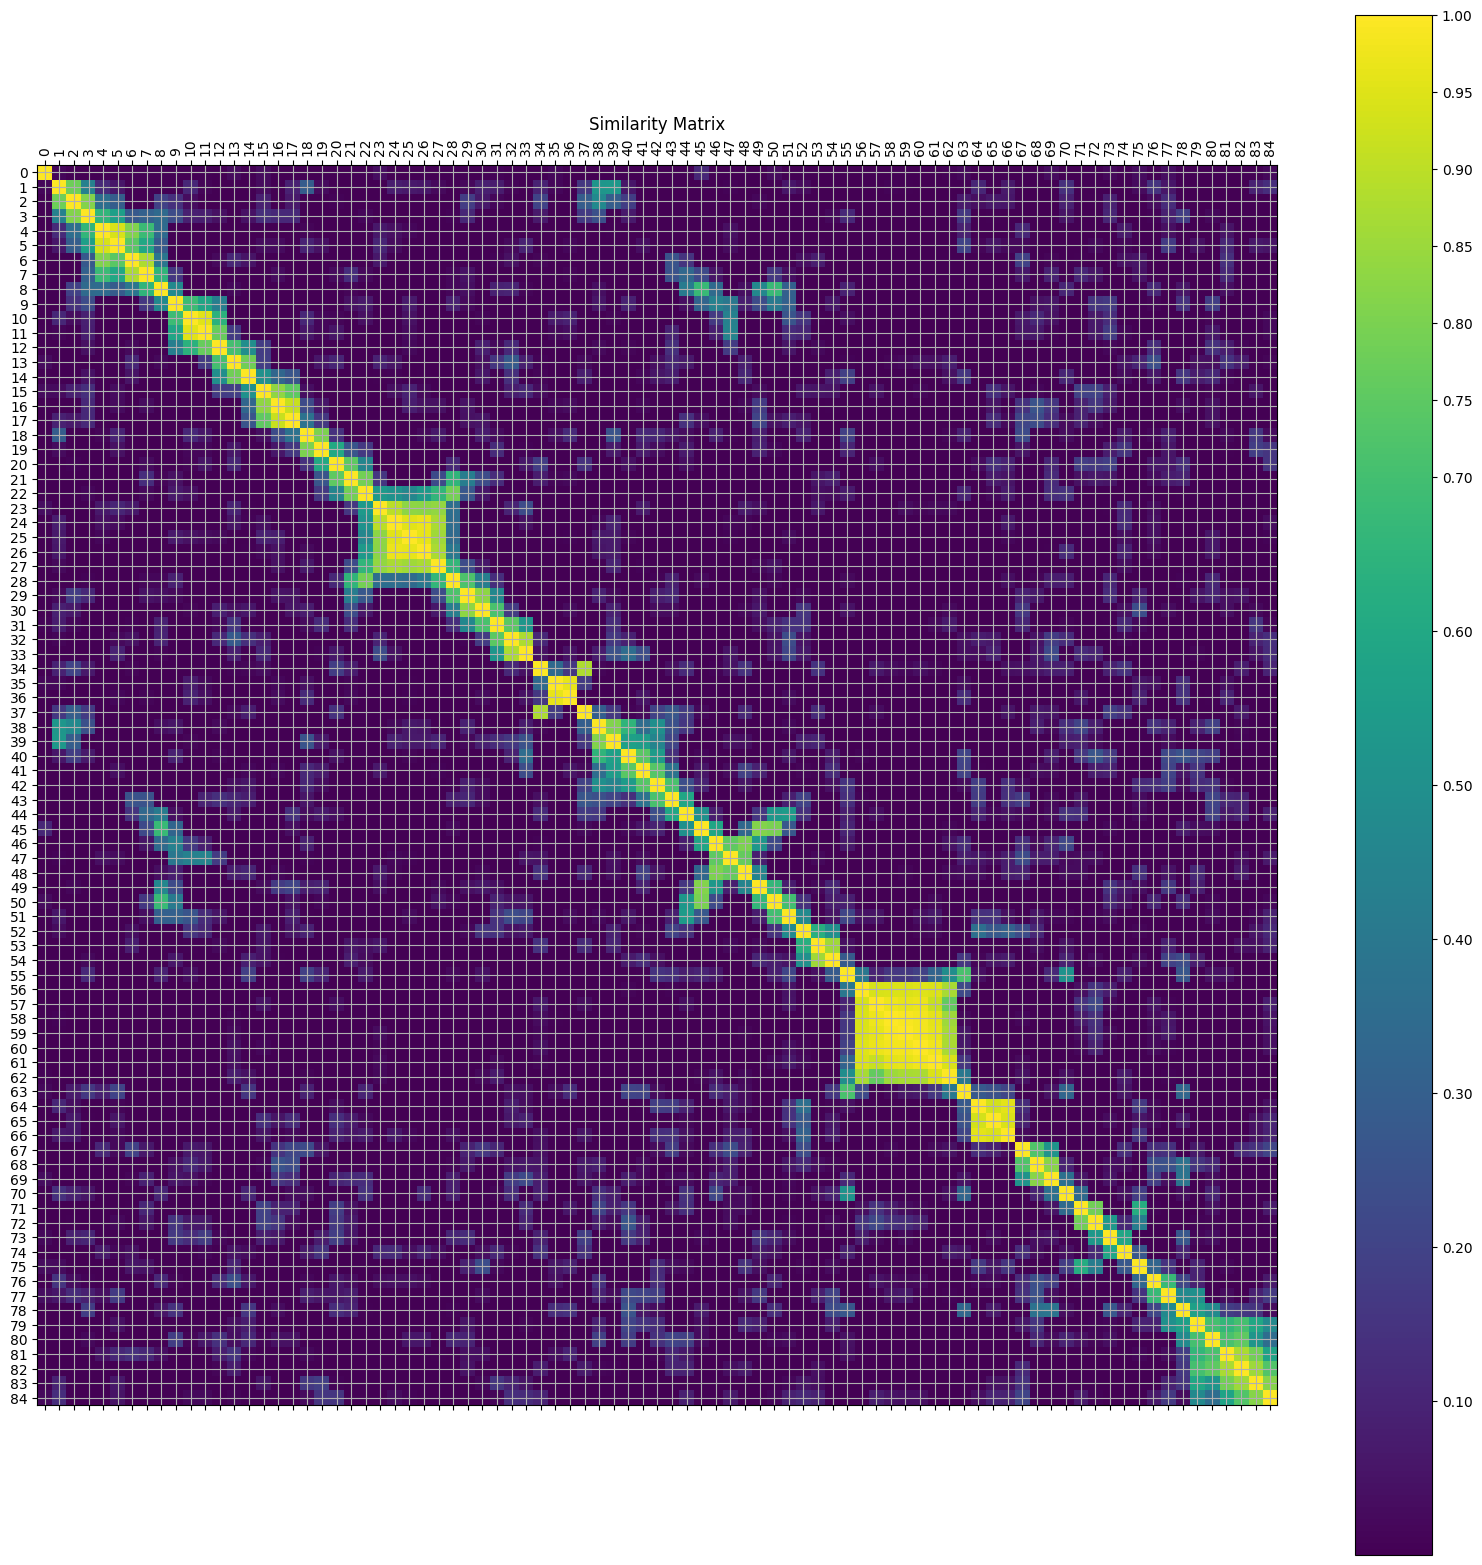

: 

In [36]:
fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(sim, interpolation='nearest')
ax.grid(True)
plt.title('Similarity Matrix')
plt.xticks(range(len(sim)), rotation=90);
plt.yticks(range(len(sim)));
fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])
plt.show()